## <center>Evaluate TICA parameters looking at growing amounts of data</center>

##### MUST SHARE KERNEL WITH NOTEBOOK `00-load-data.ipynb`

#### TICA Results from increasing `longtraj` data

- Only looking at results with good CUMVAR for full data
  - It was 2 nanoseconds for this data
- Note this code has to recalculate TICA with the smaller
  data sizes so we are loading the feature trajectories
------------

In [52]:
# done later case-by-case
# cc2 = get_hls_palette(len(good_lag_ones[0][-1]["byepochsize"])+1)

- funny arithmetic to get subplot indices
  works because `good_lag_ones` list is built in `feat`
  then `lag` order

-----------

#### <center>Cumulative Variance plots</center>

KeyError: 'byepochsize'

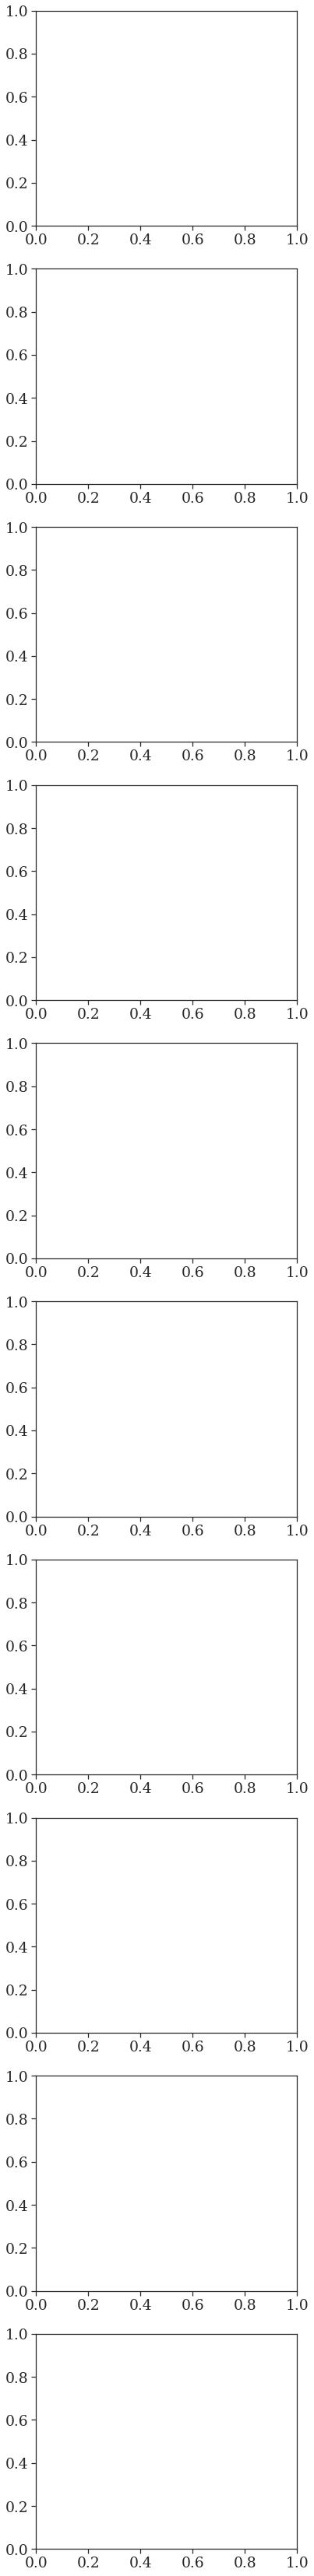

In [53]:
nm = "ltj"

plt.close()
fig, axes = plt.subplots(
    int(len(good_lag_ones) / n_features),
    n_features,
    figsize=(6 * n_features, int(6 * len(good_lag_ones) / n_features)),
    sharey=True,
    squeeze=False,
)

lastfeat = None
k = -1
for feat, nm, setup in good_lag_ones:
    if feat != lastfeat:
        lastfeat = feat
        j = -1
        k += 1

    j += 1

    cc2 = get_hls_palette(len(setup["byepochsize"]) + 1)

    for i, (es, tica) in enumerate(setup["byepochsize"]):

        seaborn.lineplot(
            range(1, 1 + n_dim),
            tica.cumvar[:n_dim],
            color=cc2[i],
            linewidth=4,
            #            label="%d μs" % (
            #               int(us_per_step * es)
            #          ) if int(us_per_step * es) > 1
            #         else "%0.2f μs" % (
            #            us_per_step * traj_features[(feat,nm)].shape[0]
            #           if es < 0
            #          else
            #         us_per_step * es
            #    ),
            ax=axes[j][k],
        )

    axes[j][k].axhline(1.0, lw=4, ls=":")
    axes[j][k].set_title(
        "%s, %s; lag %d ns"
        % (nm, feat, setup["kwargs"]["lag"] / step_per_ns[label_longtraj])
    )

    axes[j][k].set_xlabel("TIC Index")
    if k == 0:
        axes[j][k].set_ylabel("Cumulative Variance")

    axes[j][k].set_xticks(range(1, 1 + n_dim))

    axes[j][k].set_xticklabels(
        ["1"]
        + [str(l) if (l <= 10 or l % 2 == 0) else " " for l in range(2, 1 + n_dim)]
    )

    axes[j][k].grid(axis="x", alpha=0.35)

    # This should be in own panel from top down
    # --> or use less data points!
    # axes[0][1].legend(title="Total MD", framealpha=1.,
    #    title_fontsize=18, fontsize=16)


plt.tight_layout()
plt.savefig("analyses/%s-tica_cumvar-byepochsize.png" % (nm), dpi=300)

--------------
#### <center>Timescales</center>

In [ ]:
plt.close()
fig, axes = plt.subplots(
    int(len(good_lag_ones) / n_features),
    n_features,
    figsize=(6 * n_features, int(6 * len(good_lag_ones) / n_features)),
    sharey=True,
    squeeze=False,
)

lastfeat = None
k = -1
for feat, nm, setup in good_lag_ones:
    if feat != lastfeat:
        lastfeat = feat
        j = -1
        k += 1

    j += 1

    cc2 = get_hls_palette(len(setup["byepochsize"]) + 1)

    for i, (es, tica) in enumerate(setup["byepochsize"]):

        seaborn.scatterplot(
            range(1, 1 + n_timescales),
            tica.timescales[:n_timescales] * ns_per_step,
            color=cc2[i],
            s=125,
            #            label="%d μs" % (
            #               int(us_per_step * es)
            #          ) if int(us_per_step * es) > 1
            #         else "%0.2f μs" % (
            #            us_per_step * traj_features[(feat,nm)].shape[0]
            #           if es < 0
            #          else
            #         us_per_step * es
            #    ),
            ax=axes[j][k],
        )

    axes[j][k].set_title(
        "%s, %s; lag %d ns"
        % (nm, feat, setup["kwargs"]["lag"] / step_per_ns[label_longtraj])
    )

    axes[j][k].set_xlabel("TIC Index")
    if k == 0:
        axes[j][k].set_ylabel("TIC Timescale [ns]")

    axes[j][k].set_xticks(range(1, 1 + n_timescales))

    axes[j][k].set_xticklabels(
        ["1"]
        + [str(l) if (l <= 10 or l % 2 == 0) else " " for l in range(2, 1 + n_dim)]
    )
    #    axes[j][k].legend(title="Total MD", framealpha=1.,
    #       title_fontsize=18, fontsize=16)

    axes[j][k].grid(axis="x", alpha=0.35)

plt.tight_layout()
plt.savefig("analyses/%s-tica_timescales-byepochsize.png" % (nm), dpi=300)

------------------

- Eigenvector similarity to same lag master

In [ ]:
plt.close()
fig, axes = plt.subplots(
    int(len(good_lag_ones) / n_features),
    n_features,
    figsize=(6 * n_features, int(6 * len(good_lag_ones) / n_features)),
    sharey=True,
    squeeze=False,
)


lastfeat = None
k = -1

for feat, nm, setup in good_lag_ones:

    if feat != lastfeat:
        lastfeat = feat
        j = -1
        k += 1

    j += 1

    mevecs = normalize_cols(setup["result"].eigenvectors[:, :n_evecs])
    cc2 = get_hls_palette(len(setup["byepochsize"]) + 1)

    for i, (es, tica) in enumerate(setup["byepochsize"]):

        evecs = normalize_cols(tica.eigenvectors[:, :n_evecs])
        dot_by_evec = np.abs((mevecs * evecs).sum(0))

        if np.abs(np.sum(dot_by_evec) - dot_by_evec.shape[0]) < 0.001:
            continue  # then it's the master TICA model

        seaborn.scatterplot(
            range(1, 1 + n_evecs),
            dot_by_evec,
            color=cc2[i],  # cc2[1::2][j],
            s=125,
            #            label="%d μs" % (
            #               int(us_per_step * es)
            #          ) if int(us_per_step * es) > 1
            #         else "%0.2f μs" % (
            #            us_per_step * traj_features[feat].shape[0]
            #           if es < 0
            #          else
            #         us_per_step * es
            #    ),
            ax=axes[j][k],
        )

    axes[j][k].axhline(1, c="black", ls="--")
    axes[j][k].set_xlabel("TIC Index")

    axes[j][k].set_title(
        "%s, %s; lag %d ns"
        % ("ltj", feat, setup["kwargs"]["lag"] / step_per_ns[label_longtraj])
    )

    if k == 0:
        axes[j][k].set_ylabel("TIC Similarity")

    axes[j][k].set_xticks(range(1, 1 + n_evecs))
    axes[j][k].set_xticklabels(
        ["1"]
        + [str(l) if (l <= 10 or l % 2 == 0) else " " for l in range(2, 1 + n_evecs)]
    )
    #    axes[j][k].legend(title="Total MD", framealpha=1.,
    #       loc="lower center", ncol=2, title_fontsize=18, fontsize=16)

    axes[j][k].grid(axis="x", alpha=0.35)


plt.tight_layout()
plt.savefig("analyses/%s-tica_evec-dot-byepochsize-samemaster.png" % nm, dpi=300)

------------------

- Eigenvector similarity to 20ns lag master

In [ ]:
plt.close()
fig, axes = plt.subplots(
    int(len(good_lag_ones) / n_features),
    n_features,
    figsize=(6 * n_features, int(6 * len(good_lag_ones) / n_features)),
    sharey=True,
    squeeze=False,
)


lastfeat = None
k = -1

for feat, nm, setup in good_lag_ones:

    if feat != lastfeat:
        lastfeat = feat
        j = -1
        k += 1

    j += 1

    mevecs = normalize_cols(
        get_the_right_master(1000, all_models[feat]["ltj"]["tica"])[
            "result"
        ].eigenvectors[:, :n_evecs]
    )

    cc2 = get_hls_palette(len(setup["byepochsize"]) + 1)

    for i, (es, tica) in enumerate(setup["byepochsize"]):

        evecs = normalize_cols(tica.eigenvectors[:, :n_evecs])
        dot_by_evec = np.abs((mevecs * evecs).sum(0))

        if np.abs(np.sum(dot_by_evec) - dot_by_evec.shape[0]) < 0.001:
            continue  # then it's the master TICA model

        seaborn.scatterplot(
            range(1, 1 + n_evecs),
            dot_by_evec,
            color=cc2[i],  # cc2[1::2][j],
            s=125,
            #            label="%d μs" % (
            #               int(us_per_step * es)
            #          ) if int(us_per_step * es) > 1
            #         else "%0.2f μs" % (
            #            us_per_step * traj_features[feat].shape[0]
            #           if es < 0
            #          else
            #         us_per_step * es
            #    ),
            ax=axes[j][k],
        )

    axes[j][k].axhline(1, c="black", ls="--")
    axes[j][k].set_xlabel("TIC Index")

    axes[j][k].set_title(
        "%s, %s; lag %d ns"
        % ("ltj", feat, setup["kwargs"]["lag"] / step_per_ns[label_longtraj])
    )

    if k == 0:
        axes[j][k].set_ylabel("TIC Similarity")

    axes[j][k].set_xticks(range(1, 1 + n_evecs))
    axes[j][k].set_xticklabels(
        ["1"]
        + [str(l) if (l <= 10 or l % 2 == 0) else " " for l in range(2, 1 + n_evecs)]
    )
    #    axes[j][k].legend(title="Total MD", framealpha=1.,
    #       loc="lower center", ncol=2, title_fontsize=18, fontsize=16)

    axes[j][k].grid(axis="x", alpha=0.35)


plt.tight_layout()
plt.savefig("analyses/%s-tica_evec-dot-byepochsize-20master.png" % nm, dpi=300)

#### TICA Results from increasing `adaptive sampling` data
 - Note this will run fast, `adaptive sampling` already
   calculated TICA with each increment of data
-----------

In [ ]:
print(colorama.Back.LIGHTBLACK_EX + colorama.Fore.BLUE + "  DONE LOADING DATA  ")

----------

----------

----------

----------

----------

----------